# Credit Risk Default Prediction - UCI German Credit Dataset

### Executive Summary

- We trained five models to predict credit default risk on the German dataset. Simple models like Logistic Regression and Decision Trees provided initial baselines, while gradient boosting models (XGBoost and LightGBM) showed superior performance, particularly in identifying defaulters. XGBoost was selected as the final model for further tuning and feature engineering due to its balanced recall, strong ROC-AUC, and interpretability.

### 1.Downloading and Loading the Dataset

In [1]:
# from torchvision.datasets.utils import download_url

# URL of the UCI German Credit dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Where to save
# download_url(url, '.', filename='german.data')


In [2]:
import pandas as pd
import numpy as np

# Column names from UCI documentation
columns = [
    "status", "duration", "credit_history", "purpose", "amount",
    "savings", "employment", "installment_rate", "personal_status",
    "debtors", "residence_since", "property", "age",
    "other_installment_plans", "housing", "number_credits",
    "job", "people_liable", "telephone", "foreign_worker", "target"
]

# Loading the dataset and then converting it to csv file, so it becomes clean and labeled data
df = pd.read_csv('german.data', sep=' ', header=None, names=columns)
df.to_csv("german.csv", index=False)
print(df.shape)

(1000, 21)


### 2. Explore the Dataset

- Basic info about the Dataset
- Exploratory data analysis & visualization
- Ask & answer questions

In [3]:
#Loading the dataset and generating a quick statistical summary of its numerical features.

df = pd.read_csv("german.csv")
df.describe()


,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [4]:
# Checking the dataset’s structure, column types, and missing values at a glance.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment               1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status          1000 non-null   object
 9   debtors                  1000 non-null   object
 10  residence_since          1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

#### EDA Structure

- Basic Dataset Inspection
- High-Level Observations
- Univariate Analysis
- Bivariate Analysis
- Correlation Analysis

Observations about the dataset

- 1000 rows and 21 columns, including both numerical and categorical columns.
- There are no missing values.
- We have a few important ordinal columns having categorical values which needs to be encoded properly later.

In [5]:
# Let's see the distribution of all the numerical values and import the required libraries.
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Setting global plot style and figure parameters for consistent and readable visualizations
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [6]:
# Distribution of Duration
fig = px.histogram(df,
                   x = 'duration',
                   marginal = 'box',
                   nbins=13,
                   title='Distribution of Duration in months')
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
# Distribution of Age
fig = px.histogram(df,
                   x = 'age',
                   marginal = 'box',
                   nbins=8,
                   title='Distribution of Age in years')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
# Distribution of Credit amount
fig = px.histogram(df,
                   x = 'amount',
                   marginal = 'box',
                   nbins = 20,
                   title='Distribution of Credit Amount')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
# Distribution of Installment Rate in percentage of disposable income.
fig = px.histogram(df,
                   x = 'installment_rate',
                   marginal = 'box',
                   title='Distribution of Installment Rate')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
# Distribution of Present Residence Since
fig = px.histogram(df,
                   x = 'residence_since',
                   marginal = 'box',
                   title='Distribution of Residence Since in years')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
# Distribution of Number of Existing Credits at this bank
fig = px.histogram(df,
                   x = 'number_credits',
                   marginal = 'box',
                   title='Distribution of Existing Credits')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
# Distribution of People financially dependent on Borrower
fig = px.histogram(df,
                   x = 'people_liable',
                   marginal = 'box',
                   title='Distribution of Financially Dependent people on Borrower')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
# Comparing borrowers’ ages and loan amounts, colored by credit risk, to see how age relates to the size of loans and potential default.
fig = px.scatter(df,
                 x = 'amount',
                 y = 'age',
                 color = 'target',
                 opacity = 0.8,
                 title = 'Age vs. Credit amount')
fig.update_traces(marker_size=5)
fig.show()


In [14]:
# Examining the relationship between loan amount and repayment duration, colored by credit risk, to identify patterns related to defaults.
fig = px.scatter(df,
                 x = 'amount',
                 y = 'duration',
                 color = 'target',
                 opacity = 0.8,
                 title = 'Duration vs. Credit amount')
fig.update_traces(marker_size=5)
fig.show()

In [15]:
# Comparing loan amounts across different purposes and credit risk categories to see which purposes are associated with higher defaults.
fig = px.box(df,
                 x = 'purpose',
                 y = 'amount',
                 color = 'target',
                 title = 'Purpose vs. Credit amount')
fig.update_traces(marker_size=5)
fig.show()

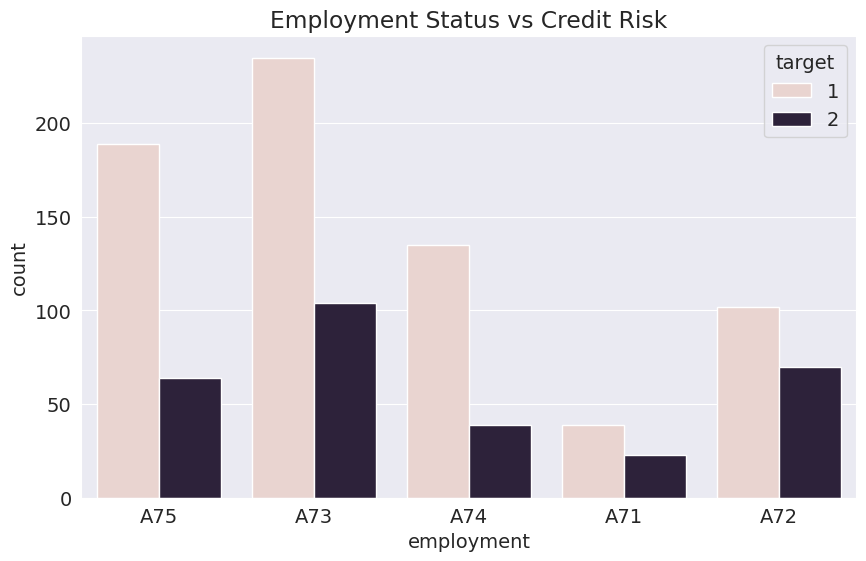

In [16]:
# Visualizing how credit risk varies across different employment durations to identify which employment categories are associated with higher defaults.

sns.countplot(x='employment', hue='target', data=df)
plt.title('Employment Status vs Credit Risk')
plt.show()

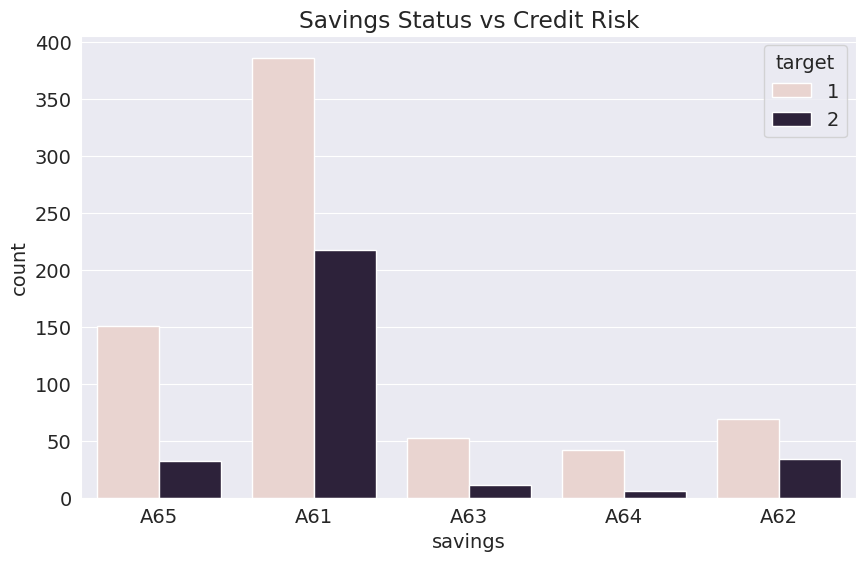

In [17]:
# Showing how borrowers’ savings categories relate to credit risk to identify which savings levels are associated with higher defaults.

sns.countplot(x='savings', hue='target', data=df)
plt.title('Savings Status vs Credit Risk')
plt.show()

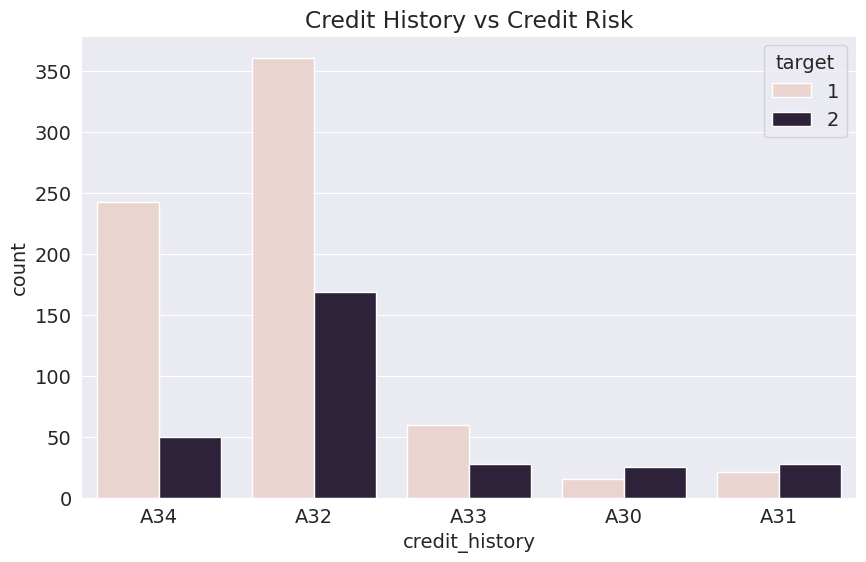

In [18]:
# Visualizing how different credit history categories relate to credit risk to identify which histories are more likely to default.

sns.countplot(x='credit_history', hue='target', data=df)
plt.title('Credit History vs Credit Risk')
plt.show()

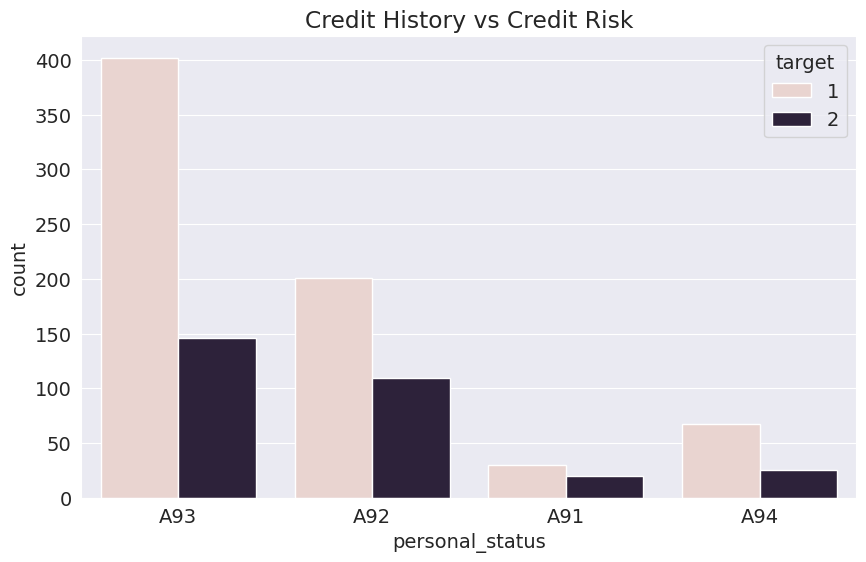

In [19]:
# Comparing borrowers’ personal status categories with credit risk to see which demographic groups are more likely to default.

sns.countplot(x='personal_status', hue='target', data=df)
plt.title('Credit History vs Credit Risk')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

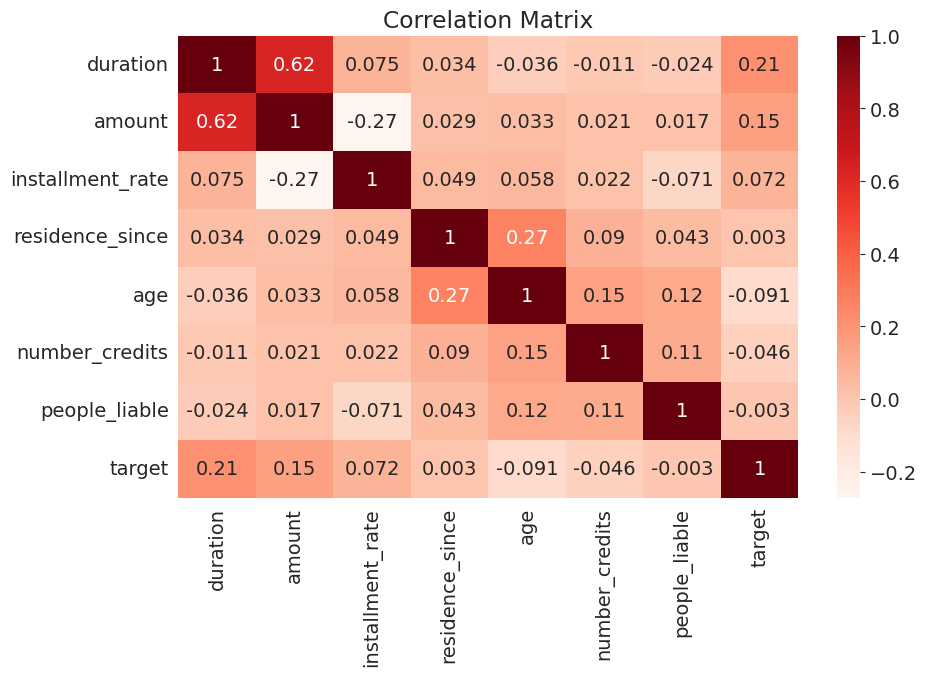

In [20]:
# Displaying the correlation matrix of all numerical features to identify relationships and potential predictors of credit risk.

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='Reds', annot = True)
plt.title('Correlation Matrix')

- Before moving on to preprocessing and feature engineeering let's Map target values to 0/1

In [21]:
df['target']= df['target'].map({1:0, 2:1})

### Ask and Answer Questions


1. Which age group has the highest defaults?   

In [22]:
df.groupby(pd.cut(df['age'], bins=[18,25,35,50,75]))['target'].mean()

/tmp/ipykernel_3033/1275199410.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



age
(18, 25]    0.421053
(25, 35]    0.296482
(35, 50]    0.237458
(50, 75]    0.274336
Name: target, dtype: float64

- The Age group 18-25 has the highest default rate.

2. Does Housing status affect credit risk?

In [23]:
df.groupby('housing')['target'].mean()

housing
A151    0.391061
A152    0.260870
A153    0.407407
Name: target, dtype: float64

- Yes, housing status affects credit risk. People who own their house(A152) have the lowest default risk compared to People renting(A151) and People living for free(A153).

3. Which tier of job has the Highest default risk and the Lowest default risk?

In [24]:
df.groupby('job')['target'].mean()

job
A171    0.318182
A172    0.280000
A173    0.295238
A174    0.344595
Name: target, dtype: float64

- Surprisingly Highly skilled workers(a174) have the highest default risk(~34.45%), while unskilled residents(A172) have the lowest(~28%)

### Preprocessing Steps

1. Missing values
2. Data type fixes
3. Outliers
4. Train-test split
5. Encoding
6. Scaling
7. Imbalance handling
8. Duplicates
9. Feature engineering
10. Feature selection


As There are no missing values in UCI German Credit Dataset, We will be moving on to our next step being Data Type fixes.

Models treat object type data like "A153" as string noise, So we will convert them to categorical datatype.

In [25]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

#### Handling Ordinal Columns

`Employment (A71 -> A75)`
- More years =  better stability

In [26]:
employment_order = ['A71', 'A72', 'A73', 'A74', 'A75']
df['employment'] = df['employment'].cat.set_categories(employment_order, ordered=True)


`Savings (A61 -> A65)`
- More savings = better financial stability

In [27]:
savings_order = ['A61', 'A62', 'A63', 'A64', 'A65']
df['savings'] = df['savings'].cat.set_categories(savings_order, ordered=True)

`Checking Account Status`
- Higher = Better Strength

In [28]:
status_order = ['A14', 'A11', 'A12', 'A13']
df['status'] = df['status'].cat.set_categories(status_order, ordered=True)

`Credit History`
- Increasing Credibility

In [29]:
credit_history_order = ['A34','A33','A32','A30','A31']
df['credit_history'] = df['credit_history'].cat.set_categories(credit_history_order, ordered=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   category
 3   purpose                  1000 non-null   category
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   category
 6   employment               1000 non-null   category
 7   installment_rate         1000 non-null   int64   
 8   personal_status          1000 non-null   category
 9   debtors                  1000 non-null   category
 10  residence_since          1000 non-null   int64   
 11  property                 1000 non-null   category
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   category
 14  housing  

#### Encoding and Scaling

- Split dataset into train/test in 80/20 ratio
- Create Inputs and Targets
- Apply Ordinal Encoder on ordinal, one hot encoder on nominal categorical and scaling on numerical features. 

In [31]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
len(train_df), len(test_df)

(800, 200)

In [32]:
# Create Inputs and Targets
input_cols = list(train_df.columns)[:-1]
train_inputs, train_targets = train_df[input_cols].copy(), train_df['target'].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df['target'].copy()


In [33]:
# Identify Numerical/Ordinal and Nominal Categorical Features
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['category']).columns.tolist()
ordinal_cols = ['employment', 'savings', 'status', 'credit_history']
nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]


In [34]:
# Ordinal Encoding
categories = [
    ['A71', 'A72', 'A73', 'A74', 'A75'],    
    ['A61', 'A62', 'A63', 'A64', 'A65'],
    ['A14', 'A11', 'A12', 'A13'],
    ['A34','A33','A32','A30','A31']
]

from sklearn.preprocessing import OrdinalEncoder

O_encoder = OrdinalEncoder(categories=categories, dtype=int)
train_inputs[ordinal_cols] = O_encoder.fit_transform(train_inputs[ordinal_cols])
test_inputs[ordinal_cols] = O_encoder.fit_transform(test_inputs[ordinal_cols])

In [35]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[nominal_cols])
encoded_cols = list(encoder.get_feature_names_out(nominal_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[nominal_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[nominal_cols])

In [36]:
# Scaling 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Train and Evaluate Models

- Logistic Regression (Baseline)
- Decision Tree (Baseline)
- Random Forest (Baseline)
- XGBoost   (Advanced Baseline)
- LightGBM  (Advanced Baseline)

Cost-Matrix for UCI German Credit Dataset

| Actual \ Predicted | 1 (Good) | 2 (Bad) |
| ------------------ | -------- | ------- |
| 1 (Good)           | 0        | 1       |
| 2 (Bad)            | 5        | 0       |

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).



## Evaluation Metrics

1. **Precision**  
- Fraction of predicted bad loans that were actually bad  
- High precision → model rarely mislabels good loans as bad

2. **Recall (Sensitivity)**  
- Fraction of actual bad loans correctly identified  
- High recall → model catches most defaults

3. **F1-score**  
- Harmonic mean of precision and recall  
- Useful when classes are imbalanced

4. **ROC-AUC (Area Under Curve)**  
- Measures how well the model separates good vs bad loans  
- 1 = perfect, 0.5 = random guessing  
- Higher value → better classifier performance


In [37]:
# Setting Class weights to align with the Cost Matrix
class_weight = {0:1, 1:5}

# Model 1: Logistic Regression
- Logistic Regression is a linear model used for binary classification. It learns coefficients that linearly separate data and outputs probabilities using a sigmoid function.

In [38]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()
X_test = test_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()

# Create and train the model
model1 = LogisticRegression(class_weight=class_weight, solver='liblinear')
model1.fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds = model1.predict(X_train)
accuracy_score(train_targets, train_preds)

0.62625

In [39]:
# Generate Predictions on Testing Data
test_preds = model1.predict(X_test)
test_probs = model1.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds)
prec = precision_score(test_targets, test_preds)
rec = recall_score(test_targets, test_preds)
f1 = f1_score(test_targets, test_preds)
roc_auc = roc_auc_score(test_targets, test_probs)
acc, prec, rec, f1, roc_auc

(0.62,
 0.43089430894308944,
 0.8983050847457628,
 0.5824175824175825,
 0.7595864887606684)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- |
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    |
| Decision Tree       | ...       | ...      | ...       | ...    | ...      | ...     |
| Random Forest       | ...       | ...      | ...       | ...    | ...      | ...     |


In [40]:
pd.set_option('display.max_columns', None)
X_train.head()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
29,0.823529,0.362386,0.666667,1.000000,0.785714,0.333333,0.0,4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
535,0.250000,0.113844,0.333333,0.000000,0.250000,0.000000,0.0,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
695,0.029412,0.054253,0.333333,1.000000,0.553571,0.000000,0.0,2,2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
557,0.250000,0.261527,0.000000,1.000000,0.178571,0.333333,0.0,2,4,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
836,0.117647,0.034995,1.000000,0.333333,0.035714,0.000000,0.0,2,4,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Model 2: Decision Tree
- A Decision Tree splits features into decision rules to classify data. It learns non-linear relationships but tends to overfit if not regularized.

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Create and Train the model
model2 = DecisionTreeClassifier(
    class_weight=class_weight,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds2 = model2.predict(X_train)
accuracy_score(train_targets, train_preds2)


1.0

In [42]:
# Generate Predictions on Testing Data
test_preds2 = model2.predict(X_test)
test_probs2 = model2.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds2)
prec = precision_score(test_targets, test_preds2)
rec = recall_score(test_targets, test_preds2)
f1 = f1_score(test_targets, test_preds2)
roc_auc = roc_auc_score(test_targets, test_probs2)
acc, prec, rec, f1, roc_auc

(0.7,
 0.4909090909090909,
 0.4576271186440678,
 0.47368421052631576,
 0.6295227791801898)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- |
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    |
| Decision Tree       | 1.0       | 0.7      | 0.49      | 0.46   | 0.47     | 0.63    |
| Random Forest       | ...       | ...      | ...       | ...    | ...      | ...     |

# Model 3: Random Forest
- Random Forest is an ensemble of multiple Decision Trees trained on random feature subsets. It reduces overfitting and improves generalization.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create and Train the model
model3 = RandomForestClassifier(
    class_weight=class_weight,
    random_state=42,
    n_estimators=100
).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds3 = model3.predict(X_train)
accuracy_score(train_targets, train_preds2)

1.0

In [44]:
# Generate Predictions on Testing Data
test_preds3 = model3.predict(X_test)
test_probs3 = model3.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds3)
prec = precision_score(test_targets, test_preds3)
rec = recall_score(test_targets, test_preds3)
f1 = f1_score(test_targets, test_preds3)
roc_auc = roc_auc_score(test_targets, test_probs3)
acc, prec, rec, f1, roc_auc

(0.775, 0.71875, 0.3898305084745763, 0.5054945054945055, 0.8173458348359177)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes    |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------  |  
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    | Baseline |
| Decision Tree       | 1.0       | 0.70     | 0.49      | 0.46   | 0.47     | 0.63    | Baseline |
| Random Forest       | 1.0       | 0.77     | 0.72      | 0.39   | 0.50     | 0.82    | Baseline |

# Model 4: XGBoost 
- XGBoost is a powerful gradient boosting algorithm that builds trees sequentially, correcting errors of previous trees. It uses regularization and optimized approximations to achieve state-of-the-art performance.

In [45]:
from xgboost import XGBClassifier

# Create and Train the model

model4 = XGBClassifier(
    n_jobs=-1,
    n_estimators=200,                   
    learning_rate=0.05,
    max_depth = 4,
    objective = "binary:logistic",
    scale_pos_weight = 5,
    random_state = 42,
).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds4 = model4.predict(X_train)
accuracy_score(train_targets, train_preds4)


0.8825

In [46]:
# Generate Predictions on Testing Data
test_preds4 = model4.predict(X_test)
test_probs4 = model4.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds4)
prec = precision_score(test_targets, test_preds4)
rec = recall_score(test_targets, test_preds4)
f1 = f1_score(test_targets, test_preds4)
roc_auc = roc_auc_score(test_targets, test_probs4)
acc, prec, rec, f1, roc_auc

(0.715,
 0.5111111111111111,
 0.7796610169491526,
 0.6174496644295302,
 0.8145209760788555)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         |  
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    | Baseline        |
| Decision Tree       | 1.0       | 0.70     | 0.49      | 0.46   | 0.47     | 0.63    | Baseline        |
| Random Forest       | 1.0       | 0.77     | 0.72      | 0.39   | 0.50     | 0.82    | Baseline        |
| XGBoost             | 0.8825    | 0.715    | 0.51      | 0.78   | 0.62     | 0.815   | Adv Baseline    |

# Model 5: LightGBM
- LightGBM is a gradient boosting framework similar to XGBoost, but uses a leaf-wise growth strategy and histogram-based splits, making it faster and often more accurate on larger datasets.

In [47]:
from lightgbm import LGBMClassifier

# Create and Train the Model
model5 = LGBMClassifier(
    verbose=-1,
    random_state=42,
    class_weight=class_weight,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    objective= "binary",
    n_jobs=-1,
).fit(X_train, train_targets)

# Generate Predictions on Training Data
train_preds5 = model5.predict(X_train)
accuracy_score(train_targets, train_preds5)

0.8275

In [48]:
# Generate Predictions on Testing Data
test_preds5 = model5.predict(X_test)
test_probs5 = model5.predict_proba(X_test)[:,1]
acc = accuracy_score(test_targets, test_preds5)
prec = precision_score(test_targets, test_preds5)
rec = recall_score(test_targets, test_preds5)
f1 = f1_score(test_targets, test_preds5)
roc_auc = roc_auc_score(test_targets, test_probs5)
acc, prec, rec, f1, roc_auc

(0.695,
 0.4895833333333333,
 0.7966101694915254,
 0.6064516129032258,
 0.8059862964298593)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         |  
| Logistic Regression | 0.62625   | 0.62     | 0.43      | 0.90   | 0.58     | 0.76    | Baseline        |
| Decision Tree       | 1.0       | 0.70     | 0.49      | 0.46   | 0.47     | 0.63    | Baseline        |
| Random Forest       | 1.0       | 0.77     | 0.72      | 0.39   | 0.50     | 0.82    | Baseline        |
| XGBoost             | 0.8825    | 0.715    | 0.51      | 0.78   | 0.62     | 0.815   | Adv Baseline    |
| LightGBM            | 0.8275    | 0.695    | 0.49      | 0.80   | 0.61     | 0.806   | Adv Baseline    |

### Model Comparison and Insights

We trained and evaluated five models on the German credit dataset:

1. Baseline Models: Logistic Regression, Decision Tree, Random Forest
2. Advanced Baseline Models: XGBoost, LightGBM

#### Observations:

- Logistic Regression: Simple linear model, high recall (0.90) but lower precision (0.43).
- Decision Tree: Overfits the training data (100% accuracy), but generalization is poor.
- Random Forest: Reduces overfitting compared to a single tree and achieves the highest ROC-AUC (0.82), but recall is low (0.39), meaning many defaulters are missed.
- XGBoost: Balances recall (0.78) and overall performance (ROC-AUC 0.815), making it the strongest advanced baseline.
- LightGBM: Similar to XGBoost with slightly lower metrics (ROC-AUC 0.806), high recall (0.80), showing that gradient boosting methods consistently outperform simpler models on this dataset.

#### Key Takeaways:

- Gradient boosting models (XGBoost and LightGBM) perform significantly better at identifying defaulters than simpler models.
- High recall is critical for credit risk prediction, as missing a defaulter is costly.
- XGBoost is selected as the final model for further improvements because of its balanced performance, interpretability, and extensive tuning potential.

# Next Step: Feature Engineering

To further improve the predictive performance, we will perform feature engineering, which can include:

1. Create New Features

- Generate additional features that could provide more information to the model.
- Consider combining existing features, creating ratios, or discretizing continuous variables.

2. Feature Selection / Reduction

- Identify and remove redundant or highly correlated features.
- Select the most important features using statistical methods or model-based importance.
- Optionally, apply dimensionality reduction techniques if the feature set is large.

3. Check & Validate

- Ensure that the newly created features are meaningful and correctly computed.
- Evaluate the impact of new features on model performance to confirm improvement.

4. Document

- Keep a clear log of all features created or modified.
- Note the reasoning behind each feature and its effect on the model.

In [62]:
# Create Master_df, Inputs and Targets
master_df = train_df.copy()
Tn_inputs, Tn_targets = train_df[input_cols].copy(), train_df['target'].copy()
Tt_inputs, Tt_targets = test_df[input_cols].copy(), test_df['target'].copy()

# Ordinal Encoding
O_encoder = OrdinalEncoder(categories=categories, dtype=int)
master_df[ordinal_cols] = O_encoder.fit_transform(master_df[ordinal_cols])
Tn_inputs[ordinal_cols] = O_encoder.fit_transform(Tn_inputs[ordinal_cols])
Tt_inputs[ordinal_cols] = O_encoder.fit_transform(Tt_inputs[ordinal_cols])

# One Hot Encoding
master_df[encoded_cols] = encoder.transform(master_df[nominal_cols])
Tn_inputs[encoded_cols] = encoder.transform(Tn_inputs[nominal_cols])
Tt_inputs[encoded_cols] = encoder.transform(Tt_inputs[nominal_cols])

# Select the columns to be used for training/prediction
X_train = Tn_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()
X_test = Tt_inputs[numeric_cols + ordinal_cols + encoded_cols].copy()


In [67]:
X_train.describe()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.095000,3360.618750,2.965000,2.846250,35.558750,1.411250,1.143750,2.377500,1.133750,0.986250,1.46250,0.237500,0.105000,0.012500,0.171250,0.282500,0.013750,0.023750,0.046250,0.00875,0.098750,0.042500,0.317500,0.550000,0.090000,0.900000,0.042500,0.057500,0.275000,0.235000,0.336250,0.153750,0.136250,0.043750,0.820000,0.175000,0.716250,0.10875,0.021250,0.187500,0.631250,0.160000,0.580000,0.420000,0.965000,0.035000
std,11.807211,2898.174863,1.122653,1.105277,11.411587,0.578828,0.351056,1.217311,1.587139,0.957709,1.09891,0.425817,0.306745,0.111172,0.376963,0.450497,0.116524,0.152365,0.210157,0.09319,0.298513,0.201853,0.465795,0.497805,0.286361,0.300188,0.201853,0.232941,0.446794,0.424264,0.472721,0.360935,0.343268,0.204666,0.384428,0.380205,0.451099,0.31152,0.144307,0.390557,0.482768,0.366835,0.493867,0.493867,0.183895,0.183895
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1380.000000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2333.000000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,4154.500000,4.000000,4.000000,42.000000,2.000000,1.000000,4.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

## Feature: Monthly Credit Installment (CreditAmount_perMonth)

- Represents the approximate monthly repayment burden by dividing the total credit amount by the loan duration.

In [51]:
def add_monthly_payment(df):
    df.loc[:,"monthly_payment"] = df["amount"] / df["duration"]
    return df


In [70]:
X_train = add_monthly_payment(X_train)
X_test = add_monthly_payment(X_test)

In [71]:
X_train.head()

,duration,amount,installment_rate,residence_since,age,number_credits,people_liable,employment,savings,status,credit_history,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_A91,personal_status_A92,personal_status_A93,personal_status_A94,debtors_A101,debtors_A102,debtors_A103,property_A121,property_A122,property_A123,property_A124,other_installment_plans_A141,other_installment_plans_A142,other_installment_plans_A143,housing_A151,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202,monthly_payment
29,60,6836,3,4,63,2,1,4,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,113.933333
535,21,2319,2,1,33,1,1,1,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,110.428571
695,6,1236,2,4,50,1,1,2,2,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,206.000000
557,21,5003,1,4,29,2,1,2,4,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,238.238095
836,12,886,4,2,21,1,1,2,4,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,73.833333


In [72]:
# Create and Train the model
model = XGBClassifier(
    n_jobs=-1,
    n_estimators=200,                   
    learning_rate=0.05,
    max_depth = 4,
    objective = "binary:logistic",
    scale_pos_weight = 5,
    random_state = 42,
)
model.fit(X_train, train_targets)

# Generate Predictions on Training Data
Tn_preds = model.predict(X_train)
accuracy_score(Tn_targets, Tn_preds)

0.88

In [ ]:
# Generate Predictions on Testing Data
Tt_preds = model.predict(X_test)
Tt_probs = model.predict_proba(X_test)[:,1]
acc = accuracy_score(Tt_targets, Tt_preds)
prec = precision_score(Tt_targets, Tt_preds)
rec = recall_score(Tt_targets, Tt_preds)
f1 = f1_score(Tt_targets, Tt_preds)
roc_auc = roc_auc_score(Tt_targets, Tt_probs)
acc, prec, rec, f1, roc_auc

(0.725,
 0.5212765957446809,
 0.8305084745762712,
 0.6405228758169934,
 0.8244981367952879)

| Model               | Train Acc | Test Acc | Precision | Recall | F1-score | ROC-AUC | Notes           |
| ------------------- | --------- | -------- | --------- | ------ | -------- | ------- | -------         |  
| XGBoost             | 0.8825    | 0.715    | 0.51      | 0.78   | 0.62     | 0.815   | Before feature  |
| XGBoost             | 0.88      | 0.725    | 0.52      | 0.83   | 0.64     | 0.824   | After feature   |

#### Decision
##### Accepted.
- Feature increased recall, F1, test accuracy, and AUC.

In [64]:
master_df = add_monthly_payment(master_df)

In [74]:
master_df["monthly_payment"].corr(master_df["target"])

np.float64(0.027854834344813832)